<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/metabolicparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df= pd.read_csv("/gdrive/My Drive/df_final_med.csv")

In [4]:
df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
0,0,99.0,100.0,37.0,120.0,71.0,NaN,13.5,33.5,-1.0,24.0,0.5,7.38,40.0,97.0,48.0,17.0,76.0,8.3,106.0,0.9,0.8,125.0,1.8,2.00,3.3,4.1,0.90,0.58,30.2,10.40,32.3,10.60,250.0,181.0,69.66,1.0,1.0,NaN,2,0
1,1,97.5,100.0,37.0,120.0,78.0,NaN,15.0,33.5,-16.0,16.0,0.5,7.19,25.0,97.0,72.5,13.5,58.0,8.1,112.5,1.7,0.8,73.0,8.6,1.75,3.2,4.4,3.65,0.58,26.9,8.35,74.4,15.65,104.0,93.0,69.66,1.0,1.0,NaN,3,0
2,2,96.0,100.0,37.0,120.0,70.0,NaN,13.0,33.5,-1.0,24.0,0.5,7.38,40.0,97.0,48.0,17.0,76.0,8.3,106.0,0.9,0.8,125.0,1.8,2.00,3.3,4.1,0.90,0.58,30.2,10.40,32.3,10.60,250.0,181.0,69.66,1.0,1.0,NaN,4,0
3,3,100.0,99.0,37.0,120.0,75.0,NaN,14.0,33.5,-15.0,11.0,0.5,7.24,24.0,96.0,48.0,12.0,76.0,7.7,113.0,1.6,0.8,85.0,8.9,1.60,2.9,4.7,0.90,0.58,30.2,10.40,32.3,10.60,250.0,181.0,69.66,1.0,1.0,NaN,5,0
4,4,102.0,100.0,36.0,120.0,74.0,NaN,17.0,33.5,-1.0,24.0,0.5,7.38,40.0,97.0,48.0,17.0,76.0,8.3,106.0,0.9,0.8,125.0,1.8,2.00,3.3,4.1,0.90,0.58,30.2,10.40,32.3,10.60,250.0,181.0,69.66,1.0,1.0,NaN,6,0


In [5]:
df.drop(['Unnamed: 0'], axis= 1, inplace=True)

In [6]:
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
0,99.0,100.0,37.0,120.0,71.0,NaN,13.5,33.5,-1.0,24.0,0.5,7.38,40.0,97.0,48.0,17.0,76.0,8.3,106.0,0.9,0.8,125.0,1.8,2.00,3.3,4.1,0.90,0.58,30.2,10.40,32.3,10.60,250.0,181.0,69.66,1.0,1.0,NaN,2,0
1,97.5,100.0,37.0,120.0,78.0,NaN,15.0,33.5,-16.0,16.0,0.5,7.19,25.0,97.0,72.5,13.5,58.0,8.1,112.5,1.7,0.8,73.0,8.6,1.75,3.2,4.4,3.65,0.58,26.9,8.35,74.4,15.65,104.0,93.0,69.66,1.0,1.0,NaN,3,0
2,96.0,100.0,37.0,120.0,70.0,NaN,13.0,33.5,-1.0,24.0,0.5,7.38,40.0,97.0,48.0,17.0,76.0,8.3,106.0,0.9,0.8,125.0,1.8,2.00,3.3,4.1,0.90,0.58,30.2,10.40,32.3,10.60,250.0,181.0,69.66,1.0,1.0,NaN,4,0
3,100.0,99.0,37.0,120.0,75.0,NaN,14.0,33.5,-15.0,11.0,0.5,7.24,24.0,96.0,48.0,12.0,76.0,7.7,113.0,1.6,0.8,85.0,8.9,1.60,2.9,4.7,0.90,0.58,30.2,10.40,32.3,10.60,250.0,181.0,69.66,1.0,1.0,NaN,5,0
4,102.0,100.0,36.0,120.0,74.0,NaN,17.0,33.5,-1.0,24.0,0.5,7.38,40.0,97.0,48.0,17.0,76.0,8.3,106.0,0.9,0.8,125.0,1.8,2.00,3.3,4.1,0.90,0.58,30.2,10.40,32.3,10.60,250.0,181.0,69.66,1.0,1.0,NaN,6,0


In [7]:
df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS',
       'SepsisLabel'],
      dtype='object')

In [8]:
df_metabolic = df[['Temp', 'EtCO2', 'BaseExcess', 'HCO3', 'pH', 'PaCO2', 'Glucose', 'Lactate', 'SepsisLabel']]

In [9]:
df_metabolic.head()

,Temp,EtCO2,BaseExcess,HCO3,pH,PaCO2,Glucose,Lactate,SepsisLabel
0,37.0,33.5,-1.0,24.0,7.38,40.0,125.0,1.8,0
1,37.0,33.5,-16.0,16.0,7.19,25.0,73.0,8.6,0
2,37.0,33.5,-1.0,24.0,7.38,40.0,125.0,1.8,0
3,37.0,33.5,-15.0,11.0,7.24,24.0,85.0,8.9,0
4,36.0,33.5,-1.0,24.0,7.38,40.0,125.0,1.8,0


In [10]:
df_metabolic.to_csv('/gdrive/My Drive/df_metabolic.csv')

In [11]:
print(df_metabolic.SepsisLabel.value_counts())

0    973683
1     20124
Name: SepsisLabel, dtype: int64


In [12]:
X=np.array(df_metabolic.drop(['SepsisLabel'],1))
y=np.array(df_metabolic['SepsisLabel'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (993807, 8)
Shape of y: (993807,)


In [13]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Number transactions X_train dataset:  (695664, 8)
Number transactions y_train dataset:  (695664,)
Number transactions X_test dataset:  (298143, 8)
Number transactions y_test dataset:  (298143,)


In [14]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 14291
Before OverSampling, counts of label '0': 681373 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (1362746, 8)
After OverSampling, the shape of train_y: (1362746,) 

After OverSampling, counts of label '1': 681373
After OverSampling, counts of label '0': 681373


In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

sm = SMOTE(random_state=2)
X_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())

print('After OverSampling, the shape of test_X: {}'.format(X_test_res.shape))
print('After OverSampling, the shape of test_y: {} \n'.format(y_test_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_test_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_res==0)))

Before OverSampling, counts of label '1': 5833


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before OverSampling, counts of label '0': 292310 

After OverSampling, the shape of test_X: (584620, 8)
After OverSampling, the shape of test_y: (584620,) 

After OverSampling, counts of label '1': 292310
After OverSampling, counts of label '0': 292310


In [16]:
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
sm_test = SMOTE(random_state=12)
x_test_res, y_test_res = sm_test.fit_sample(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [19]:
from sklearn.metrics import recall_score, classification_report, accuracy_score
print ('Validation Results')
print(clf_rf.score(x_test_res, y_test_res))
print (recall_score(y_test_res, clf_rf.predict(x_test_res)))
print(classification_report(y_test_res,clf_rf.predict(x_test_res)))
print(accuracy_score(y_test_res,clf_rf.predict(x_test_res)))

Validation Results
0.9938404433649208
0.9888611405699429
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    292310
           1       1.00      0.99      0.99    292310

    accuracy                           0.99    584620
   macro avg       0.99      0.99      0.99    584620
weighted avg       0.99      0.99      0.99    584620

0.9938404433649208


OSError: ignored

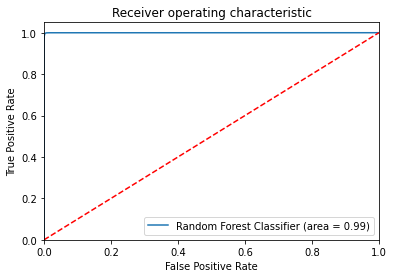

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test_res, clf_rf.predict(x_test_res))
fpr, tpr, thresholds = roc_curve(y_test_res, clf_rf.predict_proba(x_test_res)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Rf_ROC')
plt.show()

[[291965    345]
 [  3256 289054]]


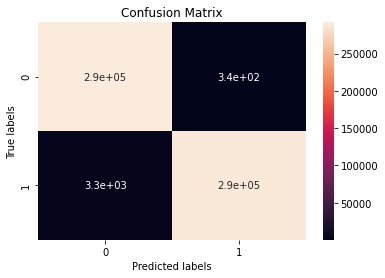

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_test_res, clf_rf.predict(x_test_res))
print(confusion_matrix_rf)
ax= plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [22]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_res,x_train_res)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.639115
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.078       
Dependent Variable: y                AIC:              1741919.9700
Date:               2020-08-07 08:29 BIC:              1742016.9701
No. Observations:   1362746          Log-Likelihood:   -8.7095e+05 
Df Model:           7                LL-Null:          -9.4458e+05 
Df Residuals:       1362738          LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     7.0000                                         
----------------------------------------------------------------------
       Coef.     Std.Err.        z        P>|z|      [0.025     0.975]
----------------------------------------------------------------------
x1     1.0185      0.0044     230.1465    0.0000     1.0098     1.0272
x2    -0.0788      0.0016    

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [24]:
logreg = LogisticRegression()
logreg.fit(x_train_res, y_train_res)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = logreg.predict(x_test_res)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test_res, y_test_res)))

Accuracy of logistic regression classifier on test set: 0.86


[[257544  34766]
 [ 44656 247654]]


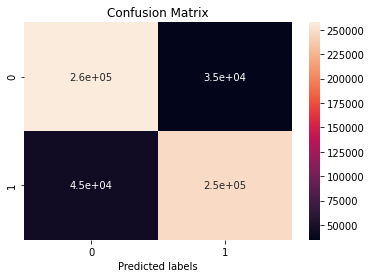

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_res, y_pred)
print(confusion_matrix)
ax_1= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax_1); #annot=True to annotate cells

# labels, title and ticks
ax_1.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax_1.set_title('Confusion Matrix'); 
ax_1.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87    292310
           1       0.88      0.85      0.86    292310

    accuracy                           0.86    584620
   macro avg       0.86      0.86      0.86    584620
weighted avg       0.86      0.86      0.86    584620



OSError: ignored

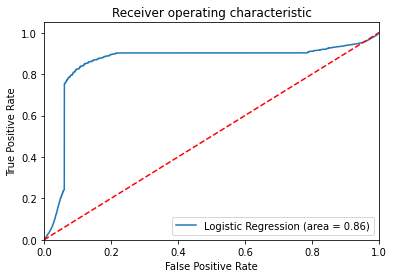

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_res, logreg.predict(x_test_res))
fpr, tpr, thresholds = roc_curve(y_test_res, logreg.predict_proba(x_test_res)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [30]:
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

In [31]:
scaler = StandardScaler()
x_train_res = scaler.fit_transform(x_train_res)
x_test_res = scaler.transform(x_test_res)

In [32]:
from sklearn import linear_model
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayesian_ridge = linear_model.BayesianRidge()
logistic = linear_model.LogisticRegression(solver='liblinear')
sgd = linear_model.SGDClassifier()

In [33]:
models = [ridge, lasso, elastic, lasso_lars, bayesian_ridge, logistic, sgd]

In [35]:
def get_cv_scores(model):
    scores = cross_val_score(model, x_train_res, y_train_res, cv=5, scoring='roc_auc')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [36]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train_res, y_train_res)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 39.5min finished


Best Score:  0.9213022192631763
Best Params:  {'C': 0.01, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l2', 'solver': 'liblinear'}


In [37]:
logistic = linear_model.LogisticRegression(C=0.01, class_weight={1:0.6, 0:0.4}, penalty='l2', solver='liblinear')

In [38]:
logistic

LogisticRegression(C=0.01, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
get_cv_scores(logistic)

CV Mean:  0.9213022192631763
STD:  0.0008262874701936031




In [40]:
predictions = logistic.fit(x_train_res, y_train_res).predict_proba(x_test_res)

In [41]:
predictions

array([[0.74295479, 0.25704521],
       [0.74295479, 0.25704521],
       [0.74295479, 0.25704521],
       ...,
       [0.12816201, 0.87183799],
       [0.01771071, 0.98228929],
       [0.12816201, 0.87183799]])

In [42]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [43]:
ann_clf = MLPClassifier()

#Parameters
parameters = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':(9,14,14,2),   # 9 input, 14-14 neuron in 2 layers,1 output layer
             'random_state': [1]}

In [44]:
# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train_res, y_train_res)

# Pick the best combination of parameters
ann_clf = grid_obj.best_estimator_

In [45]:
# Fit the best algorithm to the data 
ann_clf.fit(x_train_res, y_train_res)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=14, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [46]:
y_pred_ann = ann_clf.predict(x_test_res)

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(y_test_res, y_pred_ann)
cm_ann

array([[244926,  47384],
       [ 34068, 258242]])

In [48]:
ann_result = accuracy_score(y_test_res,y_pred_ann)
ann_result

0.8606753104580753

In [49]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(0.8378981218569327, 0.48676783897227166)

In [50]:
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

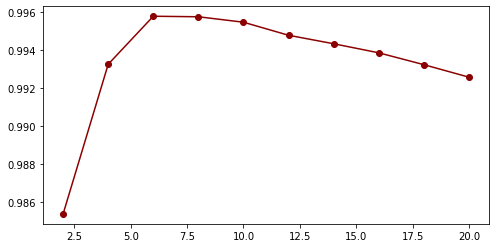

In [53]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test_res)
    accuracy = np.mean(y_test_res==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

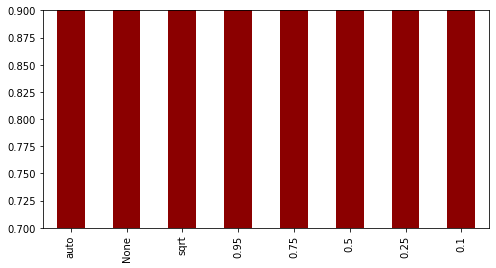

In [54]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = trees)
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test_res)
    accuracy = np.mean(y_test_res==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="darkred",ylim=(0.7,0.9))

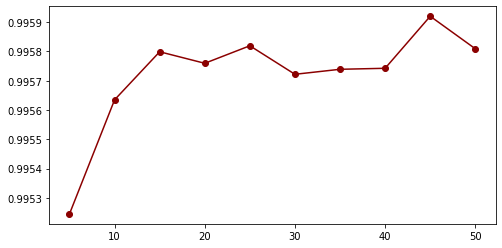

In [55]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test_res)
    accuracy = np.mean(y_test_res==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

In [56]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf = 15)
dtree.fit(x_train_res, y_train_res)
y_pred=dtree.predict(x_test_res)

In [59]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=2)
DTC.fit(x_train_res,y_train_res) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(x_test_res,y_test_res))
DTCscore = DTC.score(x_test_res,y_test_res)

Decision Tree Score:  0.9921299305531799
